In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
USA_Housing = pd.read_csv('/content/drive/MyDrive/Hoom_DataScience/Model_prediction/dataset_master.csv',parse_dates=['DATE'], index_col=['DATE'])


In [4]:
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1987-01-01 to 2021-01-01
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Housing_price_index  35 non-null     float64
 1   GDP                  35 non-null     float64
 2   Interest_rates       35 non-null     float64
 3   Inflation            35 non-null     float64
 4   Unemployment         35 non-null     float64
 5   Import_rates         35 non-null     float64
 6   Permits              35 non-null     float64
 7   Population           35 non-null     float64
dtypes: float64(8)
memory usage: 2.5 KB


In [34]:
USA_Housing.head()

,DATE,Housing_price_index,GDP,Interest_rates,Inflation,Unemployment,Import_rates,Permits,Population
0,01-01-87,66.257833,4855.21625,5.662500,3.664563,2.958333,88.050000,1541.333333,242842.5833
1,01-01-88,71.141833,5236.43800,6.197500,4.077741,2.550000,91.133333,1452.083333,245061.1667
2,01-01-89,75.508667,5641.57950,6.924167,4.827003,2.383333,93.991667,1350.333333,247387.5833
3,01-01-90,76.939667,5963.14450,6.982500,5.397956,2.691667,94.225000,1123.666667,250180.9167
4,01-01-91,75.925833,6158.12925,5.447500,4.234964,3.725000,94.850000,945.666667,253530.1667


In [35]:
USA_Housing.describe()

,Housing_price_index,GDP,Interest_rates,Inflation,Unemployment,Import_rates,Permits,Population
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,133.989698,12613.777757,3.225429,2.627026,3.102857,112.101190,1344.571429,291502.309529
std,51.618172,5339.477274,2.157297,1.243115,1.206428,17.392414,388.016887,28367.755827
min,66.257833,4855.216250,0.500000,-0.355546,1.700000,88.050000,582.000000,242842.583300
25%,81.901042,7856.435500,0.895833,1.726127,2.312500,95.537500,1110.833333,268151.208350
50%,139.243917,12217.195750,3.000000,2.677237,2.691667,109.991667,1366.916667,293262.333300
75%,171.978042,16548.582875,5.114167,3.301401,3.520833,126.154167,1608.875000,315912.208350
max,260.090000,23315.081250,6.982500,5.397956,6.133333,141.008333,2160.083333,332212.500000


In [36]:
USA_Housing.columns

Index(['DATE', 'Housing_price_index', 'GDP', 'Interest_rates', 'Inflation',
       'Unemployment', 'Import_rates', 'Permits', 'Population'],
      dtype='object')

In [37]:
X = USA_Housing[['GDP', 'Interest_rates', 'Inflation',
       'Unemployment', 'Import_rates', 'Permits', 'Population']]
y = USA_Housing['Housing_price_index']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

125.80379448592551


,Coefficient
GDP,0.013037
Interest_rates,-3.183122
Inflation,6.907882
Unemployment,2.596249
Import_rates,-0.190850
Permits,0.022320
Population,-0.000629


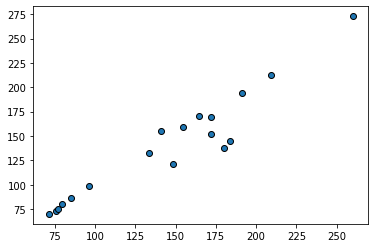

In [52]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')

In [45]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 270.93189753691684


In [54]:
y_test

18    171.779333
7      79.469833
20    179.943667
34    260.090000
30    191.396750
26    154.523083
25    140.990000
27    164.683167
32    209.467333
2      75.508667
28    172.176750
19    183.481917
16    133.741500
10     85.318000
3      76.939667
1      71.141833
22    148.552750
12     96.373500
Name: Housing_price_index, dtype: float64